# Práctica 4 - Clasificación

Nombres:
* Autor/a 1
* Autor/a 2
...

En esta práctica, tendréis que predecir la concesión de créditos de un banco. Tenéis los datasets abajo igual que en la práctica anterior.

Esta vez, obligaremos a subir una submission a la competición de kaggle, con premio especial para:
* Los ganadores de la competición
* Todo aquel que supere la precisión obtenida por los mentores

Podéis encontrar la URL de kaggle (donde se encuentran, entre otras cosas, los criterios de evaluación) aquí:
https://www.kaggle.com/t/9c6fa1489e714d45889b013bd2abd267

Suerte!

In [27]:
train_url = "https://gist.githubusercontent.com/w-dan/5b1d67c4f507b2b826ed90bec372f1a4/raw/24679757c6bf9bcc74ef4d7944196a1f37b93eba/train3.csv"
test_url = "https://gist.githubusercontent.com/w-dan/5b1d67c4f507b2b826ed90bec372f1a4/raw/24679757c6bf9bcc74ef4d7944196a1f37b93eba/test3.csv"

Un consejo para las submissions:

Guardad la columna `ID` al principio, así podéis droppear sin riesgos


```python
df_test = pd.read_csv(test_url)
submission = df_test[['ID']].copy()      # preparamos un dataframe con una columna 'ID'
```


Y ahora, para montar la submission:

```python
mis_predicciones = mi_clasificador.predict(df_test)

# al final del ejercicio, guardamos las predicciones en el dataframe 'submission' que creamos al principio
submission['Credit_Score'] = y_pred_dftest

# si habéis cambiado a números (algunos algoritmos lo requieren) la variable objetivo, revertid los cambios, por ejemplo, asi:
submission.Credit_Score = submission.Credit_Score.replace({0: "Poor", 1: "Standard", 2: "Good"})

```

Para guardarla como csv y subirla a kaggle:

```python
submission.to_csv("./mi_submission.csv", index=False)

# o si usáis google colab, os dejo una forma cómoda de descargar el csv:
from google.colab import files
submission.to_csv('mi_submission.csv', index=False)
files.download('mi_submission.csv')
```

Y directos a la cima del ranking :D


¡Mucha suerte!

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

<function matplotlib.pyplot.show(close=None, block=None)>

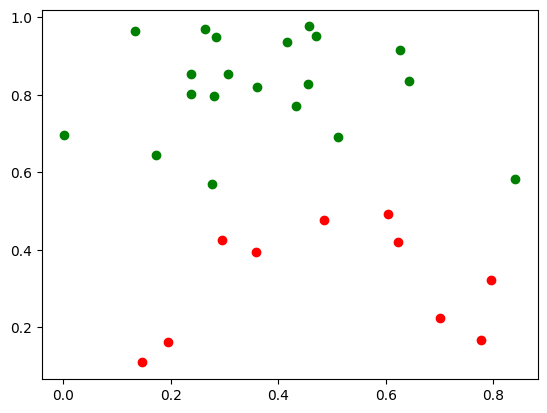

In [30]:
array = np.random.rand(30, 2)
df = pd.DataFrame(array)

def fun(x):
    if  x >= .5:
        return 1
    else:
        return 0
    
df[2] = df[1].map(fun)


falsos = df[df[2] == 0]
ciertos = df[df[2] == 1]

plt.scatter(ciertos[0], ciertos[1], c = "green")
plt.scatter(falsos[0], falsos[1], c = "red")
plt.show

        

In [31]:
from sklearn.linear_model import RidgeClassifier

clasificador = RidgeClassifier()
X = df.iloc[:, [0, 1]].values
y = df[2].values

clasificador.fit(X, y)
clasificador.predict([[.2, .4]])

array([0], dtype=int64)

In [32]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.440,8167.370000,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.580,2607.131667,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.860,2772.321667,6.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.020,1246.668333,7.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.540,5120.795000,6.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,22570,35996,5,Atossal,44.0,863986928.0,Accountant,19795.890,1203.188188,3.0,...,Standard,582.75,27.049585,324.0,Yes,159.609395,43.165679,Low_spent_Large_value_payments,286.771047,Good
64996,134156,15146,3,Carolinez,23.0,2121646.0,Scientist,33624.400,2869.033333,4.0,...,Standard,987.27,38.337145,348.0,NM,72.257138,32.825775,High_spent_Large_value_payments,421.253518,Standard
64997,145951,8722,2,Nickv,15.0,787947051.0,Teacher,17057.830,1618.485833,6.0,...,Bad,4832.80,36.584023,60.0,Yes,65.827966,26.005337,Low_spent_Medium_value_payments,238.070938,Poor
64998,27919,24372,2,Chrisc,18.0,432941541.0,Writer,125385.880,10720.823333,2.0,...,Good,1268.57,38.854570,296.0,NM,364.360310,168.868471,High_spent_Small_value_payments,437.879559,Standard


In [33]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [34]:
#puntuacion parametrizada

diccionario_puntuacion = {
    "Poor" : 0,
    "Good" : 1,
    "Standard" : 2
}

puntuacion_parametrizada = train_df["Credit_Score"].map(lambda x: diccionario_puntuacion[x])


In [35]:
processed_df = pd.DataFrame()

In [36]:
def procesar_variable_cualtitativa(dataframe: pd.DataFrame, propiedad):
    
    media_propiedad = dataframe[propiedad].mean
    serie_procesada = dataframe[propiedad]
    serie_procesada.fillna(media_propiedad)

    return serie_procesada

In [37]:
#Procesar una variable discreta

def procesar_variable_discreta(dataframe : pd.DataFrame, propiedad):

    diccionario = {}

    for valor in dataframe[propiedad].unique():
        puntuaciones = dataframe[dataframe[propiedad] == valor]["Credit_Score"]

        puntuaciones_parametrizadas = []

        for puntuacion in puntuaciones:
            puntuaciones_parametrizadas.append(diccionario_puntuacion[puntuacion])

        diccionario[valor] = np.mean(puntuaciones_parametrizadas)

    array_procesado = []

    for valor in dataframe[propiedad]:
        array_procesado.append(diccionario[valor])

    array_procesado = pd.Series(array_procesado)

    diccionario["media"] = array_procesado.mean()
    print(diccionario["media"])

    return (array_procesado, diccionario)

In [38]:
columnas_interes = ['Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

df_procesar = train_df.loc[:, columnas_interes]

processed_df = pd.DataFrame()

diccionario_propiedades = {}

for columna in df_procesar.columns:

    if df_procesar[columna].dtype == "float64":
        processed_df[columna] = procesar_variable_cualtitativa(train_df, columna)
    else:
        processed_df[columna], diccionario = procesar_variable_discreta(train_df, columna)
        diccionario_propiedades[columna] = diccionario

1.2404153846153847
1.2404153846153847
1.2404153846153847
1.2404153846153845
1.240415384615385


In [39]:
processed_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,40.0,1.221972,97384.440,8167.370000,1.0,3.0,8.0,1.0,1.548230,20.0,...,3.0,1.193952,405.45,32.643281,336.0,1.349646,77.284943,53.714219,1.335186,847.172909
1,39.0,1.257937,31369.580,2607.131667,8.0,9.0,27.0,8.0,2.000000,30.0,...,6.0,0.781201,4259.91,39.375507,144.0,1.170450,171.748418,44.990811,1.335186,280.855383
2,17.0,1.257937,30171.860,2772.321667,6.0,7.0,30.0,9.0,2.000000,49.0,...,10.0,0.781201,3406.51,34.039021,123.0,1.170450,205.403926,40.781489,1.335186,247.322615
3,22.0,1.256581,13100.020,1246.668333,7.0,5.0,6.0,5.0,1.428571,6.0,...,8.0,1.508377,727.29,34.747262,129.0,1.170450,41.177132,23.005463,1.259782,298.156832
4,26.0,1.256581,62313.540,5120.795000,6.0,2.0,18.0,4.0,2.000000,27.0,...,9.0,1.508377,817.64,24.545394,122.0,1.221685,196.679642,63.346750,1.220711,152.669902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,44.0,1.221972,19795.890,1203.188188,3.0,3.0,12.0,1.0,1.548230,24.0,...,2.0,1.508377,582.75,27.049585,324.0,1.170450,159.609395,43.165679,1.259782,286.771047
64996,23.0,1.208428,33624.400,2869.033333,4.0,5.0,20.0,4.0,1.666667,30.0,...,7.0,1.508377,987.27,38.337145,348.0,1.221685,72.257138,32.825775,1.335186,421.253518
64997,15.0,1.203523,17057.830,1618.485833,6.0,10.0,24.0,6.0,0.000000,26.0,...,10.0,0.781201,4832.80,36.584023,60.0,1.170450,65.827966,26.005337,1.220711,238.070938
64998,18.0,1.257937,125385.880,10720.823333,2.0,5.0,5.0,4.0,1.666667,17.0,...,1.0,1.193952,1268.57,38.854570,296.0,1.221685,364.360310,168.868471,1.264694,437.879559


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_df, puntuacion_parametrizada, test_size=0.2, random_state=16) 

from sklearn.ensemble import ExtraTreesClassifier

clasificador = ExtraTreesClassifier()
clasificador.fit(X_train, np.reshape(y_train, (-1, 1)))

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, clasificador.predict(X_test))
matriz


c:\Users\iocol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([[3115,   20,  637],
       [   2, 1755,  578],
       [ 806,  478, 5609]], dtype=int64)

In [41]:
#Procesar una variable discreta

def procesar_variable_test_discreta(dataframe : pd.DataFrame, propiedad):

    media_puntuacion = diccionario_propiedades[propiedad]["media"]

    array_procesado = []

    for valor in dataframe[propiedad]:
        if diccionario_propiedades[propiedad].get(valor):
            array_procesado.append(diccionario_propiedades[propiedad][valor])
        else:
            array_procesado.append(diccionario_propiedades[propiedad]["media"])

    return (pd.Series(array_procesado), diccionario)

In [42]:
diccionario_propiedades

{'Occupation': {'Accountant': 1.2219715768102866,
  'Writer': 1.257937484617278,
  'Doctor': 1.2565805074697651,
  'Mechanic': 1.2370387140593162,
  'Entrepreneur': 1.203469292076887,
  'Teacher': 1.2035234121464997,
  'Engineer': 1.2049910873440286,
  'Journalist': 1.2344665885111372,
  'Developer': 1.2510922051046218,
  'Media_Manager': 1.2983476844309985,
  'Manager': 1.2363852556480381,
  'Lawyer': 1.2658416897802431,
  'Architect': 1.2740923352756612,
  'Scientist': 1.2084277299501587,
  'Musician': 1.2529711375212225,
  'media': 1.2404153846153847},
 'Type_of_Loan': {'Debt Consolidation Loan': 1.5482295482295483,
  'Home Equity Loan, Not Specified, Not Specified, Personal Loan, Not Specified, Mortgage Loan, Mortgage Loan, and Personal Loan': 2.0,
  'Personal Loan, Home Equity Loan, Home Equity Loan, Mortgage Loan, Personal Loan, Student Loan, Credit-Builder Loan, Mortgage Loan, and Mortgage Loan': 2.0,
  'Credit-Builder Loan, Credit-Builder Loan, Not Specified, Home Equity Loan, 

In [43]:
procesar_variable_test_discreta(test_df, "Occupation")[0]

0        1.251092
1        1.257937
2        1.236385
3        1.234467
4        1.256581
           ...   
14995    1.298348
14996    1.208428
14997    1.204991
14998    1.236385
14999    1.265842
Length: 15000, dtype: float64

In [44]:
#procesado df_test

columnas_interes = ['Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

df_procesar = test_df.loc[:, columnas_interes]

processed_test_df = pd.DataFrame()

for columna in df_procesar.columns:
    print(columna)
    if df_procesar[columna].dtype == "float64":
        processed_test_df[columna] = procesar_variable_cualtitativa(test_df, columna)
    else:
        processed_test_df[columna] = procesar_variable_test_discreta(test_df, columna)[0]

Age
Occupation
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Type_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Credit_Mix
Outstanding_Debt
Credit_Utilization_Ratio
Credit_History_Age
Payment_of_Min_Amount
Total_EMI_per_month
Amount_invested_monthly
Payment_Behaviour
Monthly_Balance


In [45]:
processed_test_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,19.0,1.251092,126744.39,10545.032500,5.0,4.0,1.0,4.0,1.666667,1.0,...,1.0,1.193952,839.57,31.096209,374.0,1.349646,313.942666,95.509845,1.283905,742.300805
1,15.0,1.257937,70286.60,5718.216667,7.0,10.0,25.0,6.0,1.240415,18.0,...,7.0,0.781201,1553.07,38.325524,112.0,1.170450,205.342435,64.801132,1.154112,75.407703
2,35.0,1.236385,26408.13,2146.677500,4.0,6.0,19.0,6.0,2.000000,18.0,...,5.0,1.508377,65.19,34.980213,74.0,1.170450,73.560979,20.852530,1.154112,142.926874
3,22.0,1.234467,19627.93,1339.660833,0.0,7.0,12.0,4.0,1.000000,4.0,...,7.0,1.193952,141.58,29.571965,210.0,1.349646,51.000371,35.618202,1.154112,208.263554
4,43.0,1.256581,70334.76,5602.230000,9.0,9.0,21.0,3.0,0.600000,55.0,...,15.0,0.781201,1438.69,32.132949,194.0,1.170450,91.612636,68.286892,1.264694,520.586339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,50.0,1.298348,107761.29,9047.107500,4.0,5.0,9.0,0.0,1.469598,7.0,...,3.0,1.508377,34.09,41.899992,211.0,1.170450,0.000000,150.220682,1.335186,984.123010
14996,33.0,1.208428,16218.32,1098.526667,6.0,6.0,21.0,5.0,0.333333,44.0,...,6.0,0.781201,4466.33,24.275710,98.0,1.221685,64.533114,34.457893,1.264694,260.523798
14997,25.0,1.204991,29374.77,2377.897500,3.0,7.0,6.0,2.0,1.291139,23.0,...,7.0,1.508377,1189.37,38.439021,241.0,1.221685,40.264074,22.234178,1.283905,403.980355
14998,15.0,1.236385,43782.45,3543.537500,6.0,9.0,25.0,8.0,0.800000,32.0,...,12.0,0.781201,3468.25,24.233841,85.0,1.170450,240.664739,42.839562,1.259782,146.741586


In [46]:
prediccion_test = clasificador.predict(processed_test_df.values)

diccionario_puntuacion = {
    0: "Poor",
    1 : "Good",
    2: "Standard"
}

prediccion_test = prediccion_test.tolist()
prediccion_test = list(map(lambda x: diccionario_puntuacion[x], prediccion_test))

c:\Users\iocol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [50]:
from csv import writer

with open("resultados.csv", "w") as file:
    escritor = writer(file, lineterminator="\n")

    escritor.writerow(["ID", "Credit_Score"])

    for i, dato in enumerate(prediccion_test):
        escritor.writerow([i + 1,dato])